# Relationship of Free Throw Percentage of NBA Players by Position and Games Played

#### By Tony DiRubbo

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Introduction

The National Basketball Association (NBA) itself is a sports league heavily rested in its statistics. Websites such as basketball-reference.com provide a cornucopia of basketball related data which users can obtain starting from the founding years of the NBA. The link below leads to the player statistical totals for the last complete NBA Season (2021-2022), from there the data can be exported to CSV format.

https://www.basketball-reference.com/leagues/NBA_2022_totals.html

The data field contains the total statistics for every NBA player for the 2021-2022 NBA season. This includes variables ranging from points scored to minutes played. Each of the 540 players who played in the league during this season is an observational unit for this study, none of the players will be removed from the data field. The entire population of NBA players who played at least one game this season will be examined.

The response variable is a player's total free throw percentage. This is being changed from field goal percentage due to analysis from a pervious test using R. The research question being asked is if a player’s free throw percentage is possibly affected by the position of that player and/or the number of games that player played.

In [2]:
df = pd.read_csv('20212022NBATotals.csv')
df = df[['Player','Pos','G','FT%']]
df = df.rename(
    columns={
        'Pos':'Position',
        'G':'GamesPlayed',
        'FT%':'FreeThrowPercentage',
    })
df

,Player,Position,GamesPlayed,FreeThrowPercentage
0,Precious Achiuwa,C,73,0.595
1,Steven Adams,C,76,0.543
2,Bam Adebayo,C,56,0.753
3,Santi Aldama,PF,32,0.625
4,LaMarcus Aldridge,C,47,0.873
...,...,...,...,...
541,Thaddeus Young,PF,52,0.469
542,Trae Young,PG,76,0.904
543,Omer Yurtseven,C,56,0.623
544,Cody Zeller,C,27,0.776


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player               546 non-null    object 
 1   Position             546 non-null    object 
 2   GamesPlayed          546 non-null    int64  
 3   FreeThrowPercentage  546 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 12.9+ KB


In [4]:
df.head

<bound method NDFrame.head of                 Player Position  GamesPlayed  FreeThrowPercentage
0     Precious Achiuwa        C           73                0.595
1         Steven Adams        C           76                0.543
2          Bam Adebayo        C           56                0.753
3         Santi Aldama       PF           32                0.625
4    LaMarcus Aldridge        C           47                0.873
..                 ...      ...          ...                  ...
541     Thaddeus Young       PF           52                0.469
542         Trae Young       PG           76                0.904
543     Omer Yurtseven        C           56                0.623
544        Cody Zeller        C           27                0.776
545        Ivica Zubac        C           76                0.727

[546 rows x 4 columns]>

The chunk above imports the data field and then cleans the data, so the only variables looked at are player name, position, games played, and the players field goal percentage.  The structure of the data is printed as well as the first five rows of the new data field.

## Descriptive Statistics for Free Throw Percentage

In [5]:
df.describe()

,GamesPlayed,FreeThrowPercentage
count,546.000000,546.000000
mean,47.238095,0.747626
std,23.555013,0.148856
min,1.000000,0.000000
25%,29.000000,0.681000
50%,52.000000,0.767500
75%,67.000000,0.842000
max,82.000000,1.000000


Text(0.5, 0, 'Free Throw Percentage')

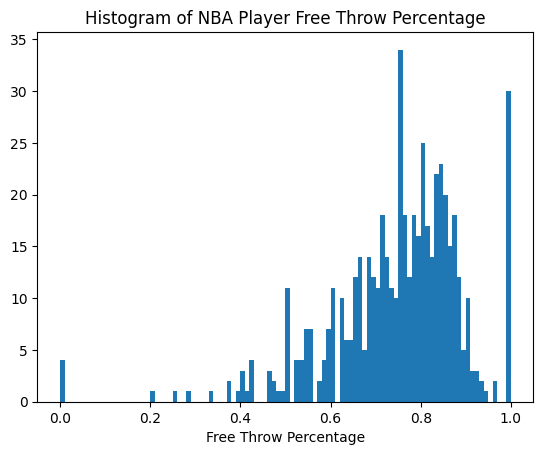

In [6]:
plt.hist(df['FreeThrowPercentage'],bins=100)
plt.title('Histogram of NBA Player Free Throw Percentage')
plt.xlabel('Free Throw Percentage')

Text(0.5, 0, 'Free Throw Percentage')

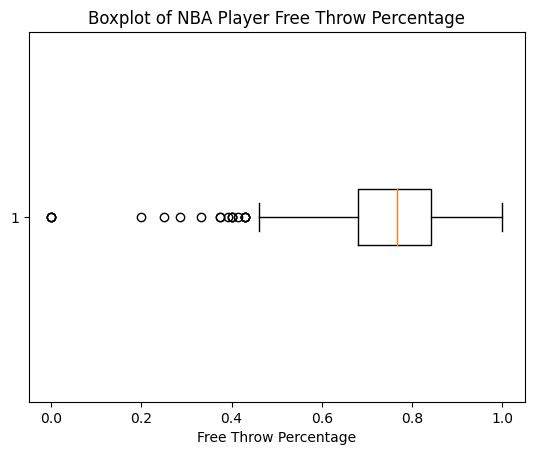

In [7]:
plt.boxplot(df['FreeThrowPercentage'],vert=False)
plt.title('Boxplot of NBA Player Free Throw Percentage')
plt.xlabel('Free Throw Percentage')

## Free Throw Percentage by Position

### Using Pandas

Text(0.5, 0, 'Free Throw Percentage')

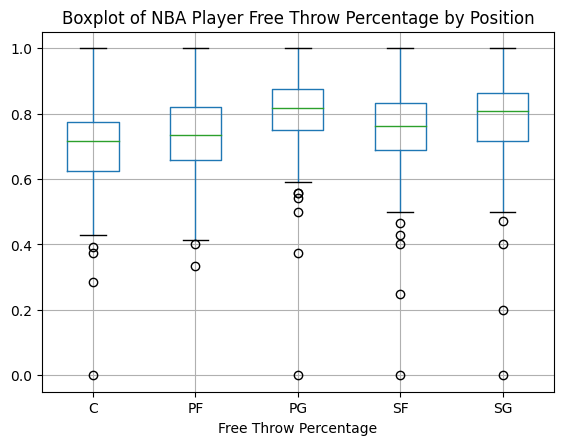

In [8]:
df.boxplot(column = 'FreeThrowPercentage', by = 'Position') #Pandas Boxplot not Matplotlib
plt.suptitle('') #Clears out pregenerated title
plt.title('Boxplot of NBA Player Free Throw Percentage by Position')
plt.xlabel('Free Throw Percentage')

### Using Matplotlib

Text(0.5, 0, 'Free Throw Percentage')

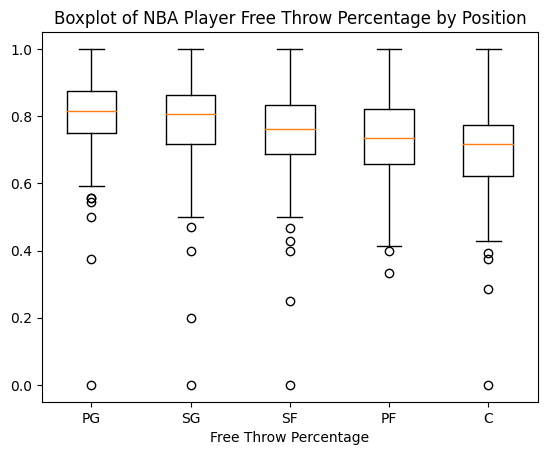

In [9]:
PointGuard = df.loc[df['Position']=='PG','FreeThrowPercentage'].values #isolates the variables by position type
ShootingGuard = df.loc[df['Position']=='SG','FreeThrowPercentage'].values
SmallForward = df.loc[df['Position']=='SF','FreeThrowPercentage'].values
PowerForward = df.loc[df['Position']=='PF','FreeThrowPercentage'].values
Center = df.loc[df['Position']=='C','FreeThrowPercentage'].values

plt.boxplot([PointGuard,ShootingGuard,SmallForward,PowerForward,Center],labels=['PG','SG','SF','PF','C'])
plt.title('Boxplot of NBA Player Free Throw Percentage by Position')
plt.xlabel('Free Throw Percentage')

## Free Throw Percentage vs Games Played

Text(0, 0.5, 'Games Played')

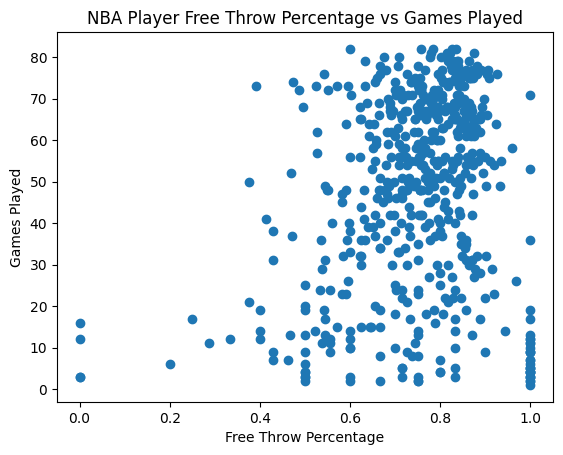

In [10]:
plt.scatter(df['FreeThrowPercentage'],df['GamesPlayed'])
plt.title('NBA Player Free Throw Percentage vs Games Played')
plt.xlabel('Free Throw Percentage')
plt.ylabel('Games Played')